In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']


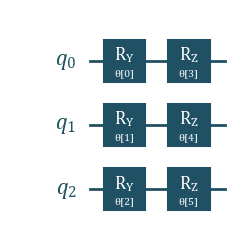

In [3]:
qc = QuantumCircuit(3)
qc.compose(EfficientSU2(3, reps=0), inplace=True)

qc.decompose().draw('mpl', style='bw')
my_blue = '#1F5063'
blue_white_style = {
    "backgroundcolor": "#FFFFFF",
    "linecolor": my_blue,
    "textcolor": my_blue,
    "gatetextcolor": my_blue,
    "gatefacecolor": "#FFFFFF",
    "gateoutlinecolor": my_blue,
    # This dictionary overrides the 'bw' black for specific gate types
    "displaycolor": {
        "u": [my_blue, "#FFFFFF"],        # [Outline/Text, Fill]
        "reset": [my_blue, "#FFFFFF"],    # Just in case you add these
        "measure": [my_blue, "#FFFFFF"],   # Just in case you add these
        "ry": [my_blue, "#FFFFFF"],         # Just in case you add these
        "rz": [my_blue, "#FFFFFF"]         # Just in case you add these
    }
}
# 3. Draw it
qc.decompose().draw('mpl', style=blue_white_style)

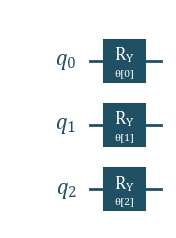

In [4]:
qc = QuantumCircuit(3)
qc.compose(RealAmplitudes(3, reps=0), inplace=True)
my_blue = '#1F5063'
blue_white_style = {
    "backgroundcolor": "#FFFFFF",
    "linecolor": my_blue,
    "textcolor": my_blue,
    "gatetextcolor": my_blue,
    "gatefacecolor": "#FFFFFF",
    "gateoutlinecolor": my_blue,
    # This dictionary overrides the 'bw' black for specific gate types
    "displaycolor": {
        "u": [my_blue, "#FFFFFF"],        # [Outline/Text, Fill]
        "reset": [my_blue, "#FFFFFF"],    # Just in case you add these
        "measure": [my_blue, "#FFFFFF"],   # Just in case you add these
        "ry": [my_blue, "#FFFFFF"]   # Just in case you add these
    }
}
# 3. Draw it
qc.decompose().draw('mpl', style=blue_white_style)

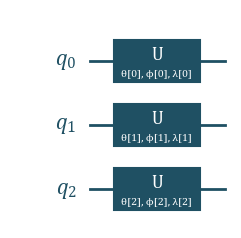

In [5]:
qc = QuantumCircuit(3)
for i in range(3):
    theta0 = Parameter(f'θ[{i}]')
    phi0 = Parameter(f'ϕ[{i}]')
    lam0 = Parameter(f'λ[{i}]')
    qc.u(theta0,phi0,lam0,i)
# Your custom Blue-White style
my_blue = '#1F5063'
blue_white_style = {
    "backgroundcolor": "#FFFFFF",
    "linecolor": my_blue,
    "textcolor": my_blue,
    "gatetextcolor": my_blue,
    "gatefacecolor": "#FFFFFF",
    "gateoutlinecolor": my_blue,
    # This dictionary overrides the 'bw' black for specific gate types
    "displaycolor": {
        "u": [my_blue, "#FFFFFF"],        # [Outline/Text, Fill]
        "reset": [my_blue, "#FFFFFF"],    # Just in case you add these
        "measure": [my_blue, "#FFFFFF"]   # Just in case you add these
    }
}
# 3. Draw it
qc.draw('mpl', style=blue_white_style)

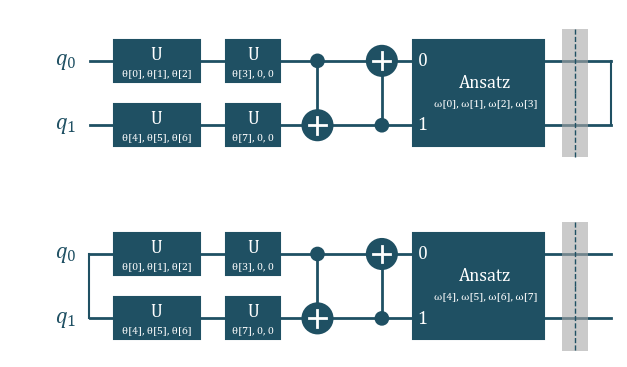

In [15]:
import matplotlib.pyplot as plt
from utils import create_multivariate_circuit

# Custom Blue-White theme with Pink U-gate override
# We target 'EfficientSU2' specifically for the blue outline
my_style = {
    "backgroundcolor": "#FFFFFF",
    "linecolor": "#1F5063",
    "textcolor": "#1F5063",
    "gatetextcolor": "#1F5063",
    "gatefacecolor": "#FFFFFF",
    "gateoutlinecolor": "#1F5063",
    "displaycolor": {
        "u": ["#1F5063", "#FFFFFF"],             # Blue border/text, White fill
        "EfficientSU2": ["#1F5063", "#FFFFFF"],  # Blue border, White fill
        "efficientsu2": ["#1F5063", "#FFFFFF"],  # (Lowercase fallback)
        "cx": ["#1F5063", "#1F5063"]             # Blue CNOTs for entanglement
    }
}

class DummyArgs:
    def __init__(self, encoding, window_size, num_feats=4):
        self.encoding = encoding
        self.window_size = window_size
        self.reps = 2
        self.ansatz = 'efficientsu2'
        self.entangle = 'circular'
        self.run = 42
        self.reorder = False
        self.map = None
        # 4 features forces the code to use 2 U-gates (3 + 1 padding)
        self.features = [f"f{i}" for i in range(num_feats)]
args = DummyArgs(encoding='compact', window_size=2)
qc, _, _ = create_multivariate_circuit(args, barriers=True)

# Reach into the circuit and rename any instructions named 'EfficientSU2'
for instruction in qc.data:
    if instruction.operation.name.lower() == 'efficientsu2':
        instruction.operation.label = "Ansatz"

# Update your style to target the new label name for the blue outline
my_style["displaycolor"]["Ansatz"] = ["#1F5063", "#FFFFFF"]
qc.draw('mpl', style=my_style, fold = 8)

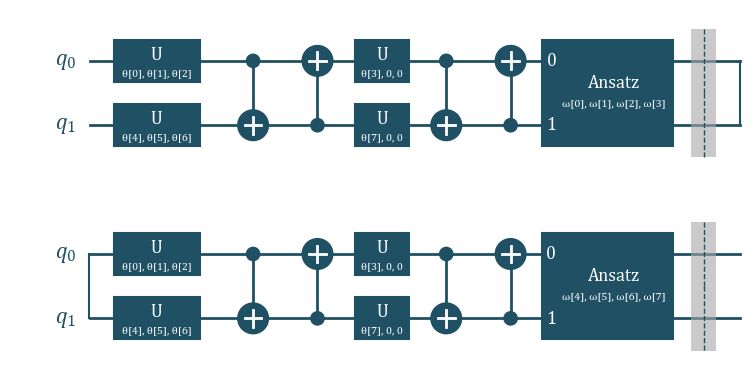

In [14]:
args = DummyArgs(encoding='accumulated', window_size=2)
qc, _, _ = create_multivariate_circuit(args, barriers=True)

# Reach into the circuit and rename any instructions named 'EfficientSU2'
for instruction in qc.data:
    if instruction.operation.name.lower() == 'efficientsu2':
        instruction.operation.label = "Ansatz"

# Update your style to target the new label name for the blue outline
my_style["displaycolor"]["Ansatz"] = ["#1F5063", "#FFFFFF"]
qc.draw('mpl', style=my_style, fold=10)

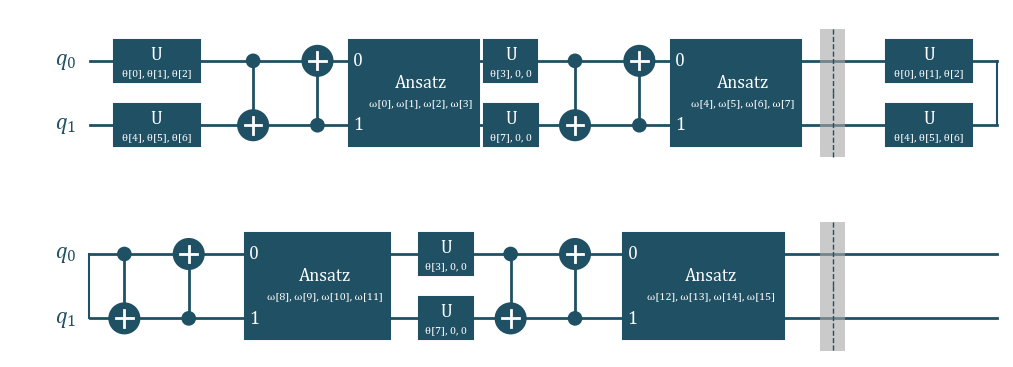

In [20]:
args = DummyArgs(encoding='serial', window_size=2)
qc, _, _ = create_multivariate_circuit(args, barriers=True)

# Reach into the circuit and rename any instructions named 'EfficientSU2'
for instruction in qc.data:
    if instruction.operation.name.lower() == 'efficientsu2':
        instruction.operation.label = "Ansatz"

# Update your style to target the new label name for the blue outline
my_style["displaycolor"]["Ansatz"] = ["#1F5063", "#FFFFFF"]
qc.draw('mpl', style=my_style, fold = 14)

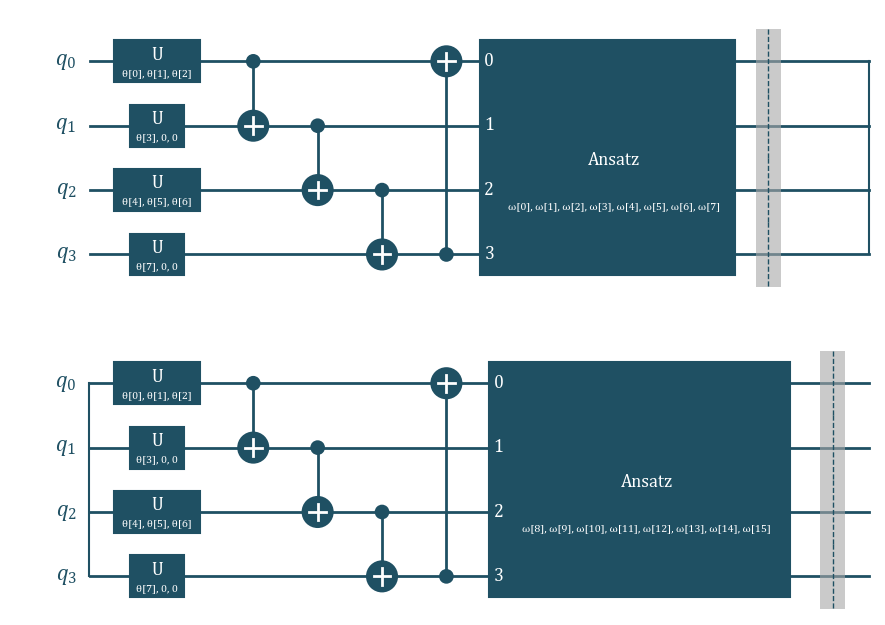

In [9]:
# window_size=1 + 4 features = 2 qubits in Parallel mode
args = DummyArgs(encoding='parallel', window_size=2, num_feats=4)
qc, _, _ = create_multivariate_circuit(args, barriers=True)

# Reach into the circuit and rename any instructions named 'EfficientSU2'
for instruction in qc.data:
    if instruction.operation.name.lower() == 'efficientsu2':
        instruction.operation.label = "Ansatz"

# Update your style to target the new label name for the blue outline
my_style["displaycolor"]["Ansatz"] = ["#1F5063", "#FFFFFF"]
qc.draw('mpl', style=my_style, fold = 12)